In [2]:
# Importing packages

import pandas as pd
import numpy as np

# To plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# For nomalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# Getting the data
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2019,1,1)
end = dt.datetime(2019,12,31)
dates = pd.date_range(start, end)

data = web.DataReader('IBM', 'yahoo', start, end)

# Printing the head of the dataset
print(data.head())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-01-02  115.980003  111.690002  112.010002  115.209999  4239900.0   
2019-01-03  114.879997  112.690002  114.529999  112.910004  4346700.0   
2019-01-04  117.489998  114.440002  114.910004  117.320000  4477800.0   
2019-01-07  118.830002  116.669998  117.500000  118.150002  3751200.0   
2019-01-08  120.570000  118.980003  119.660004  119.830002  4763600.0   

             Adj Close  
Date                    
2019-01-02  108.800987  
2019-01-03  106.628937  
2019-01-04  110.793617  
2019-01-07  111.577446  
2019-01-08  113.163979  


C:\Users\yasha\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


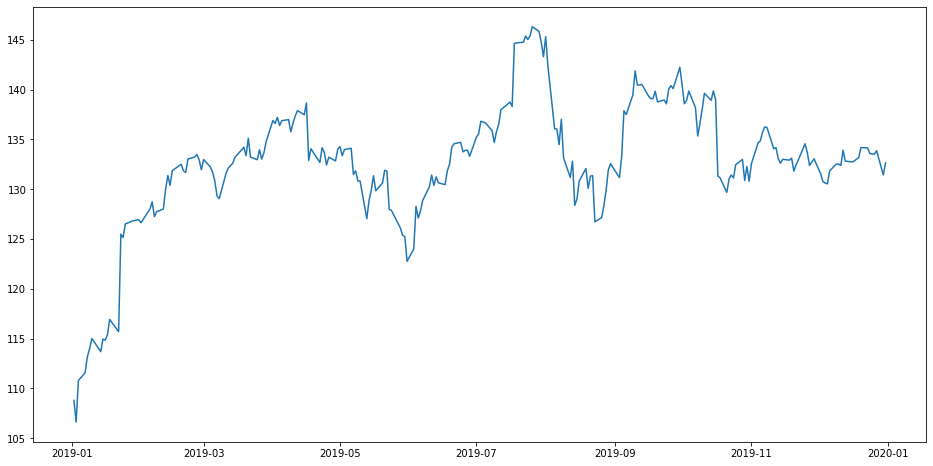

In [3]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(data['Adj Close'], label='Close Price history')

In [15]:
y = data['Adj Close']

train = data['2019-01-01':'2019-10-31']
test  = data['2019-11-01':]

In [35]:
len(test)

41

In [30]:
test.iloc[:,:5].head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-11-01,135.559998,134.089996,134.500000,135.529999,3089800.0
2019-11-04,137.740005,136.229996,136.240005,137.669998,3335400.0
2019-11-05,138.759995,137.630005,137.800003,137.889999,3015000.0
2019-11-06,138.779999,137.550003,138.000000,138.779999,4477300.0
2019-11-07,139.139999,137.580002,137.869995,137.690002,4073800.0


In [18]:
train['Open'].head()

Date
2019-01-02    112.010002
2019-01-03    114.529999
2019-01-04    114.910004
2019-01-07    117.500000
2019-01-08    119.660004
Name: Open, dtype: float64

In [66]:
def get_fomula(x):
    x1 = x['High']
    B1 = (np.sum((x1 - np.mean(x1)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x1 - np.mean(x1)) ** 2)

    x2 = x['Low']
    B2 = (np.sum((x2 - np.mean(x2)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x2 - np.mean(x2)) ** 2)

    x3 = x['Open']
    B3 = (np.sum((x3 - np.mean(x3)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x3 - np.mean(x3)) ** 2)

    x4 = x['Close']
    B4 = (np.sum((x4 - np.mean(x4)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x4 - np.mean(x4)) ** 2)

    x5 = x['Volume']
    B5 = (np.sum((x5 - np.mean(x5)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x5 - np.mean(x5)) ** 2)

    B0 = np.mean(x['Adj Close']) - B1 * np.mean(x1) - B2 * np.mean(x2) - B3 * np.mean(x3) - B4 * np.mean(x4) - B5 * np.mean(x5)
    
    return B1,B2,B3,B4,B5,B0

In [67]:
get_fomula(train)

(1.0193350250744029,
 1.0150109812602313,
 1.0093165172563334,
 1.0351979031479612,
 -4.6546244169221925e-07,
 -426.05029748847113)

In [20]:
# Calculating prediction

def calc_predictions(x):
    return B0 + B1 * x['High'] + B2 * x['Low'] + B3 * x['Open'] + B4 * x['Close'] + B5 * x['Volume']



In [36]:
X_test = test.iloc[:,:5]
y_test = test['Adj Close']
y_pred = calc_predictions(X_test)
print(y_pred[:10])

Date
2019-11-01    122.848831
2019-11-04    131.100334
2019-11-05    135.512479
2019-11-06    135.894208
2019-11-07    135.219854
2019-11-08    132.679138
2019-11-11    128.350124
2019-11-12    126.379097
2019-11-13    122.516740
2019-11-14    118.335031
dtype: float64


In [39]:
print(len(X_test))
print(len(y_test))

41
41


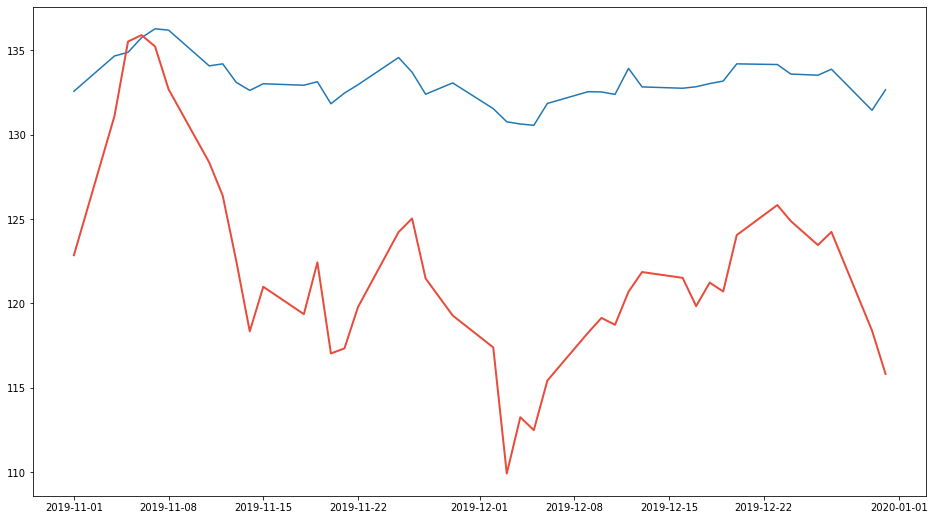

In [56]:
plt.figure(figsize = (16,9))
plt.plot(y_test.index,y_test)
plt.plot(y_pred.index, y_pred, color = '#e74c3c', linewidth = 2)
plt.show()

In [57]:
#  Calculating RMSE 
def get_rmse(y_actual, y_predicted):
    return np.sqrt((np.sum((y_actual - y_predicted) ** 2)) / len(y_actual))

print(get_rmse(y_test, y_pred))


12.069543818506455


In [58]:
y_test.head()

Date
2019-11-01    132.563690
2019-11-04    134.656845
2019-11-05    134.872040
2019-11-06    135.742554
2019-11-07    136.267075
Name: Adj Close, dtype: float64

In [86]:
test.iloc[:,:5].head(10)

,High,Low,Open,Close,Volume
Date,,,,,
2019-11-01,135.559998,134.089996,134.500000,135.529999,3089800.0
2019-11-04,137.740005,136.229996,136.240005,137.669998,3335400.0
2019-11-05,138.759995,137.630005,137.800003,137.889999,3015000.0
2019-11-06,138.779999,137.550003,138.000000,138.779999,4477300.0
2019-11-07,139.139999,137.580002,137.869995,137.690002,4073800.0
2019-11-08,137.610001,136.160004,137.580002,137.610001,2278400.0
2019-11-11,137.199997,135.000000,137.199997,135.470001,2568000.0
2019-11-12,136.660004,135.020004,135.869995,135.589996,3046500.0
2019-11-13,135.580002,133.850006,135.389999,134.479996,2918400.0


In [71]:
X_test7=test.iloc[:7,:]
X_test7.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,135.559998,134.089996,134.500000,135.529999,3089800.0,132.563690
2019-11-04,137.740005,136.229996,136.240005,137.669998,3335400.0,134.656845
2019-11-05,138.759995,137.630005,137.800003,137.889999,3015000.0,134.872040
2019-11-06,138.779999,137.550003,138.000000,138.779999,4477300.0,135.742554
2019-11-07,139.139999,137.580002,137.869995,137.690002,4073800.0,136.267075


In [167]:
X_test.index[0]

1572566400000000000

In [72]:
get_fomula(X_test7)

(0.8944504641532804,
 0.7646448679440582,
 0.897738962885603,
 0.8246258907335446,
 4.983027698551732e-07,
 -330.41462856455496)

In [73]:
test['Adj Close'].iloc[:7]

Date
2019-11-01    132.563690
2019-11-04    134.656845
2019-11-05    134.872040
2019-11-06    135.742554
2019-11-07    136.267075
2019-11-08    136.187897
2019-11-11    134.070023
Name: Adj Close, dtype: float64

In [75]:
y_test8=test['Adj Close'].iloc[7]
y_test8

134.18878173828125

In [79]:
y_pred8=calc_predictions(test.iloc[7])
y_pred8

126.37909663698781

In [82]:
np.sqrt((np.sum((y_test8 - y_pred8) ** 2)))

7.809685101293439

In [165]:


def func(x,ma):
    date=[]
    pred=[]
    
    for i in range(len(x)-ma):
        x_train = x.iloc[:i,:i+ma]
        index = x.index
        date.append(index[i+ma])
        get_fomula(x_train)
        y_test=x['Adj Close'].iloc[i+ma]
        y_pred = calc_predictions(x.iloc[i+ma])
        pred.append(y_pred)
        
    return pred,date

In [166]:
func(data,30)

C:\Users\yasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\yasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\yasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\Users\yasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


([130.89825004327136,
  134.22481963897593,
  135.85331298155907,
  136.3021019110717,
  134.8149560729752,
  139.2570597206746,
  142.73327087920285,
  142.90425573102377,
  140.13358945813994,
  136.9310149854991,
  140.71556971719687,
  138.97808808454516,
  135.4110160830786,
  133.70743571451865,
  126.11566798450468,
  120.93853406991794,
  130.24263774369788,
  137.39714564779158,
  137.17889743287716,
  137.9093468244502,
  139.98925849742784,
  142.5925509794001,
  146.57835211817454,
  143.09053662248886,
  144.91847070345472,
  143.946474174156,
  140.10421381680715,
  144.40961392430188,
  142.05060126305935,
  143.1115705501184,
  146.58579473570205,
  153.08443605932322,
  157.0230333625214,
  158.54070945511543,
  157.0300565134596,
  156.49931079708594,
  156.96088064460776,
  153.31956016714676,
  154.66783917831188,
  158.63417401691396,
  160.7250207320047,
  159.65659130538023,
  161.3934243363208,
  133.80621882746328,
  141.19373161892696,
  140.19190240688317,
  

In [170]:
date

[]

In [128]:
# print(len(data.iloc[20:,:]))
# print(len(pred))

232
232


In [169]:
print(len(date))
print(len(pred))

0
222


ValueError: x and y must have same first dimension, but have shapes (0,) and (222,)

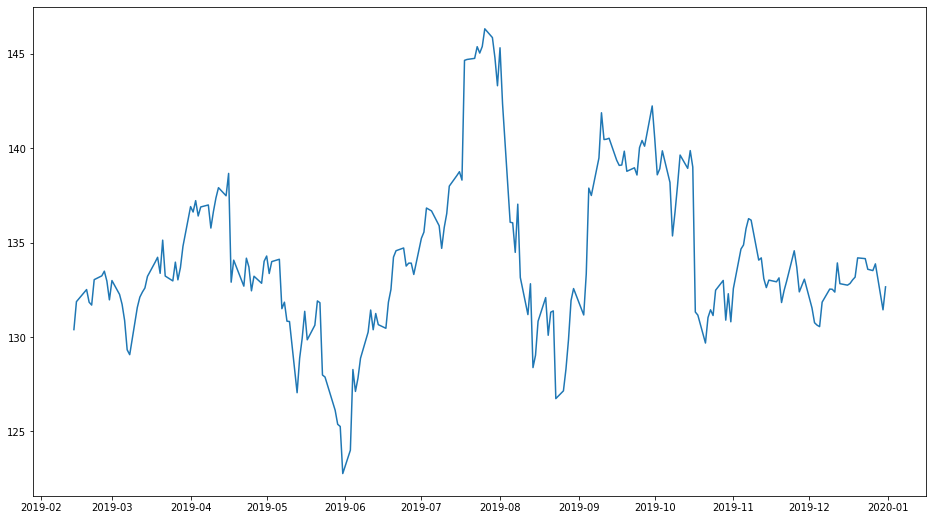

In [161]:
plt.figure(figsize = (16,9))
# plt.plot(data.iloc[7:,:].index, data.iloc[7:,:]['Adj Close'])
# plt.plot(np.arange(len(pred))-1, data.iloc[30:,:]['Adj Close'])
# plt.plot(np.arange(len(pred))-1, pred, color = '#e74c3c', linewidth = 2)
plt.plot(data.iloc[30:,:].index, data.iloc[30:,:]['Adj Close'])
plt.plot(date, pred, color = '#e74c3c', linewidth = 2)
plt.show()